<table style="text-align: left; width: 100%;" border="0"
 cellpadding="0" cellspacing="0">

  <tbody>
    <tr align="center" style="height: 1px; background-color: rgb(0, 0, 0);">
      <td><img src="https://i.imgur.com/RGV3U0q.png" title="source: imgur.com" /></td>
      <td><big><big><big><big><span style="font-family: Calibri; color: white; font-weight: bold;">Laboratorio III</span></big></big></big></big></td>
      <td><img src="https://i.imgur.com/YOQky86.png" title="source: imgur.com" style="width: 250px; height: auto;" /></td>
    </tr>
    <tr align="center">
      <td colspan="3" rowspan="1"
 style="height: 1px; background-color: rgb(68, 68, 100);"></td>
    </tr>
    <tr align="center">
      <td colspan="3" rowspan="1"><big><big><big><big><span
 style="font-family: Calibri;">Grupo7<br> RN: LSTM <br> Varios 7 <br>Label Encoding con Optimización de Pesos</span></big></big></big></big><br>
      </td></tr>
    <tr align="center">       
      <td colspan="3" rowspan="1" style="height: 1px; background-color: rgb(68, 68, 100);"></td>
    </tr>
  </tbody>
</table>


<span style="font-family: Calibri; font-weight: bold; ">Autores:</span>
<br style="font-family: Calibri; font-style: italic;">
<span style="font-family: Calibri; font-style: italic;">aDigital</span>
<div class="footer">&copy; 2024</div>

<hr>

# Formula Total Forecast Error

$$
\text{Total Forecast Error} = \frac{\sum_{\text{sku}} |\text{Actual Sales} - \text{Forecast Sales}|}{\sum_{\text{sku}} \text{Actual Sales}}
$$



# Optimización y Ajuste de Pesos en Redes Neuronales. 

Dentro de este tema, puedes encontrar subtemas específicos relacionados con LSTM, como:

1. **Ajuste de Pesos en LSTM**
2. **Funciones de Pérdida y Optimización en Redes Neuronales**
3. **Importancia de las Características en Modelos Recurrentes**
4. **Uso de Pesos en Puertas de LSTM**
5. **Propagación hacia Atrás (Backpropagation) a través del Tiempo (BPTT)**

Estos subtemas abarcan cómo los pesos se ajustan y optimizan durante el entrenamiento de redes neuronales, especialmente en el contexto de LSTM y otros modelos recurrentes.

# Label Encoding

One-Hot Encoding y Label Encoding son dos técnicas comunes para transformar variables categóricas en un formato numérico que los modelos de aprendizaje automático pueden utilizar. Vamos a explorar en qué consisten cada una y por qué se podría recomendar una sobre la otra en el contexto de un modelo LSTM.


Label Encoding asigna un número entero único a cada categoría.

Ventajas:

- Eficiencia: No aumenta el número de columnas. Solo convierte la categoría en un número.
- Simplicidad: Fácil de implementar y consume menos memoria.

Desventajas:

- Suposición de orden: Puede introducir un orden implícito en las categorías, lo que no siempre es deseable o correcto. Los modelos pueden interpretar incorrectamente que una categoría tiene más peso o importancia que otra.

¿Por qué Label Encoding podría ser mejor para tu modelo LSTM?

1.	Eficiencia: En un modelo LSTM, que maneja secuencias de datos, mantener la dimensionalidad baja es importante para la eficiencia del modelo. One-Hot Encoding puede incrementar significativamente la dimensionalidad si hay muchas categorías, mientras que Label Encoding mantiene una sola columna.
2.	Manejo de Secuencias: Label Encoding es más eficiente cuando se trata de secuencias, ya que no aumenta la cantidad de datos a procesar en cada paso de la secuencia. Esto puede hacer que el modelo sea más rápido y menos propenso a problemas de memoria.

Cómo Funciona con tus Datos

Con 36 meses de datos y seq_length de 12, se crearán secuencias de la siguiente manera:

	1.Primera Secuencia:
    	•Datos: Meses 1 a 12
    	•Etiqueta: Mes 13
	2.Segunda Secuencia:
    	•Datos: Meses 2 a 13
    	•Etiqueta: Mes 14
	3.Continúa así hasta:
    	•Última Secuencia: Meses 24 a 35
    	•Etiqueta: Mes 36

En total, tendrás 36 - 12 = 24 secuencias.

Resumen

	•	Tienes datos de 36 meses.
	•	Usas seq_length=12 para crear secuencias de 12 meses consecutivos.
	•	Cada secuencia de 12 meses predice el siguiente mes.
	•	Creas un total de 24 secuencias de entrada.

Espero que esto aclare cómo se utilizan los 12 períodos (seq_length=12) dentro de tus 36 meses de datos. Si necesitas ajustar este seq_length o tienes más preguntas, házmelo saber.

## Contenido de esta notebook:

**1. Entrenamiento del Modelo Explicacion:**
- process_and_train_model entrena el modelo LSTM con los datos proporcionados.
- results contiene las predicciones para el último período disponible.

**2. Guardado de Resultados:**
- Se guarda el DataFrame results en un archivo CSV, renombrando tn_pred a tn.

**3. Actualización del DataFrame df_ventas2:**
- Se copia df_ventas en df_ventas2.
- Se encuentra el último período y se calcula el siguiente.
- Se copian los datos del último período al siguiente.
- Se actualizan las tn del siguiente período con las predicciones de results.
- Se elimina la columna pred_tn

In [1]:
import pandas as pd

def calcular_total_forecast_error(actual, forecast):
    """
    Calcula el Total Forecast Error dado un DataFrame con ventas reales y pronosticadas.

    Parámetros:
    actual (pd.Series): Serie con las ventas reales.
    forecast (pd.Series): Serie con las ventas pronosticadas.

    Retorna:
    float: El Total Forecast Error.
    """
    # Calcular el error absoluto
    abs_error = abs(actual - forecast)
    
    # Calcular el Total Forecast Error
    total_forecast_error = abs_error.sum() / actual.sum()
    
    print("\n\n-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")
    print(f'    >>>>>>>>>>>>       Total Forecast Error: {total_forecast_error:.2%}     <<<<<<<<<<<<<<<<<<')
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------\n\n")

    
    return total_forecast_error

# Ejemplo de uso
# Crear un DataFrame de ejemplo
data = {
    'product_id': [1, 2, 3, 4, 5],
    'actual_sales': [100, 150, 200, 250, 300],
    'forecast_sales': [110, 145, 190, 260, 310]
}
df = pd.DataFrame(data)

# Calcular el Total Forecast Error
tfe = calcular_total_forecast_error(df['actual_sales'], df['forecast_sales'])
#print("\n\n-----------------------------------------------------------------------------")
#print("-----------------------------------------------------------------------------")
#print(f'    >>>>>>>>>>>>       Total Forecast Error: {tfe:.2%}     <<<<<<<<<<<<<<<<<<')
#print("-----------------------------------------------------------------------------")
#print("-----------------------------------------------------------------------------\n\n")





-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
    >>>>>>>>>>>>       Total Forecast Error: 4.50%     <<<<<<<<<<<<<<<<<<
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------




# Funciones para calcular el tiempo de ejecucion del script completo

In [2]:
# Funciones para calcular el tiempo de ejecucion del script completo
from datetime import datetime
def registrar_tiempo():
    ahora = datetime.now()
    ahora_str = ahora.strftime("%Y-%m-%d %H:%M:%S")
    return ahora, ahora_str

def calcular_tiempo_transcurrido(inicio, fin):
    return (fin - inicio).total_seconds()

# Registrar el tiempo de inicio al inicio del script
inicio, inicio_str = registrar_tiempo()


<hr>

# Funcion nombre_file(sfx)
   - Genera el nombre del archivo .csv con prefijo datetime YYYY-MM-DD

In [3]:
# --------------------------------------
# Funcion nombre_file(sfx)
#   - Genera el nombre del archivo .csv con prefijo datetime YYYY-MM-DD
from datetime import datetime
def nombre_file(sfx):
    # Obtener la fecha y hora actual en el formato requerido
    current_time = datetime.now().strftime('%Y%m%d-%H%M-')

    # Path to output dir
    output_dir = './666_Kaggle/Entregas/'    
    return(output_dir+current_time+sfx+'.csv')


# Indicar el nombre de la prueba
suffix_name = 'MongoAurelio' 

file_to_kaggle = nombre_file(suffix_name)
print(file_to_kaggle)


# ------------------------------------------------
# Esto va al final para escribir el archivo final

# Agrego el tfe2 al suffix del archivo
#   Calculo del total forecast error
#   tfe2 =  calcular_total_forecast_error(all_forecasts['y'], all_forecasts['yhat1'])
#    print(f'Total Forecast Error: {tfe2:.2%}')

tfe2 = 0.123456789
str_tfe2 = "_tfe2_" + str(round(tfe2, 4)) 

# Suffijo general para las dos salidas de archivos
#  Solo cambiar este valor
suffix_general = 'Sufijo-General'  + str_tfe2

# Usar la función nombre_file para asignar el nombre del archivo de salida para kaggle
suffix_to_kaagle_name = suffix_general
file_to_kaggle = nombre_file(suffix_to_kaagle_name)
# Colocar el nombre del df apropiado
#df_aGuardarEnDisco.to_csv(file_to_kaggle, index=False)

#all_forecasts.to_csv(file_to_kaggle+'all', index=False)
print(f'Predicciones ajustadas guardadas en {file_to_kaggle}')

# Fin
# ------------------------------------------------



./666_Kaggle/Entregas/20240714-0801-MongoAurelio.csv
Predicciones ajustadas guardadas en ./666_Kaggle/Entregas/20240714-0801-Sufijo-General_tfe2_0.1235.csv


## Lecutura rapida de Dataset sell-z-780-all-LTSM.csv

In [4]:
import pandas as pd

ventas_LTSM_path = './66_Datos/sell-z-780-all-LTSM.csv'
df_ventas = pd.read_csv(ventas_LTSM_path)

# Convertir la columna 'periodo' a tipo datetime
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'], format='%Y-%m-%d')

# Formatear la fecha según el formato deseado
print(df_ventas.info())

df_ventas.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             28080 non-null  int64         
 1   periodo                28080 non-null  datetime64[ns]
 2   plan_precios_cuidados  28080 non-null  float64       
 3   cust_request_qty       28080 non-null  float64       
 4   cust_request_tn        28080 non-null  float64       
 5   tn                     28080 non-null  float64       
 6   cant_periodos          28080 non-null  int64         
 7   cat1                   28080 non-null  object        
 8   cat2                   28080 non-null  object        
 9   cat3                   28080 non-null  object        
 10  brand                  28080 non-null  object        
 11  sku_size               28080 non-null  int64         
 12  descripcion            28080 non-null  object        
dtypes

,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cant_periodos,cat1,cat2,cat3,brand,sku_size,descripcion
0,20001,2017-01-01,0.0,479.0,937.72717,934.77222,36,HC,ROPA LAVADO,Liquido,ARIEL,3000,genoma
1,20001,2017-02-01,0.0,432.0,833.72187,798.01620,36,HC,ROPA LAVADO,Liquido,ARIEL,3000,genoma


In [5]:
# Asumiendo que 'df_ventas' es tu DataFrame y la columna 'periodo' está en formato yyyymm
# Filtramos los datos para excluir noviembre y diciembre de 2019


#df_ventas = df_ventas[~df_ventas['periodo'].isin(['2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01','2019-08-01' ])]
#df_ventas = df_ventas[df_ventas['periodo'].isin(['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-11-01','2019-12-01'])]
# Suponiendo que df_ventas ya está definido
df_ventas = df_ventas.reset_index(drop=True)

# Verifica que los periodos han sido eliminados


In [6]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             28080 non-null  int64         
 1   periodo                28080 non-null  datetime64[ns]
 2   plan_precios_cuidados  28080 non-null  float64       
 3   cust_request_qty       28080 non-null  float64       
 4   cust_request_tn        28080 non-null  float64       
 5   tn                     28080 non-null  float64       
 6   cant_periodos          28080 non-null  int64         
 7   cat1                   28080 non-null  object        
 8   cat2                   28080 non-null  object        
 9   cat3                   28080 non-null  object        
 10  brand                  28080 non-null  object        
 11  sku_size               28080 non-null  int64         
 12  descripcion            28080 non-null  object        
dtypes

In [7]:
aa = df_ventas.loc[df_ventas['product_id']== 21276]
#aa.to_csv('../66_Datos/21276.csv', index=False)
aa.head(2)

,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cant_periodos,cat1,cat2,cat3,brand,sku_size,descripcion
24264,21276,2017-01-01,0.0,0.0,0.0,0.0,10,PC,PIEL1,Cara,NIVEA,140,reconstruccion
24265,21276,2017-02-01,0.0,0.0,0.0,0.0,10,PC,PIEL1,Cara,NIVEA,140,reconstruccion


# LTSM agregando CAT1 v2

2024-07-01

## Predicción de Ventas Mensuales Utilizando Modelos LSTM con Datos Enriquecidos y Predicción Iterativa de Enero y Febrero 2020


Explicación del Código

	1.	Registrar el Tiempo:
	•	Funciones registrar_tiempo y calcular_tiempo_transcurrido para medir el tiempo de ejecución.
	2.	Preparación de Datos:
	•	Conversión de la columna periodo a int si no lo es.
	•	Normalización de la columna tn.
	3.	Modelo LSTM:
	•	Configuración y entrenamiento del modelo LSTM con early_stopping.
	4.	Predicción en Cadena:
	•	Predicción de enero de 2020 utilizando los últimos 12 meses de datos.
	•	Incorporación de la predicción de enero de 2020 para predecir febrero de 2020.

Este código te permitirá entrenar tu modelo con los datos disponibles y realizar predicciones en cadena para enero y febrero de 2020.

El código de tu compañero tiene varias características que podrían mejorar tu modelo. Aquí hay algunas posibles mejoras que podrías considerar:

1. **Escalado de Datos**:
   - Tu compañero usa `MinMaxScaler` en lugar de `StandardScaler`. El `MinMaxScaler` puede ser más adecuado para modelos de redes neuronales, ya que escala los datos en un rango de 0 a 1, lo que a menudo mejora la convergencia del modelo.

2. **Arquitectura del Modelo**:
   - La arquitectura del modelo de tu compañero tiene dos capas LSTM, lo que permite al modelo capturar patrones más complejos en los datos temporales. Aunque tu modelo utiliza una sola capa LSTM, añadir una segunda capa podría mejorar la capacidad de modelado de secuencias largas y complejas.

3. **Manejo de Datos Insuficientes**:
   - Tu compañero tiene una estrategia explícita para manejar casos con datos insuficientes, utilizando la media de los datos disponibles como predicción. Esto asegura que siempre haya una predicción, incluso cuando hay pocos datos históricos, lo que puede evitar problemas en la predicción de productos con pocos registros.

4. **Predicción de Múltiples Meses**:
   - El modelo de tu compañero no solo predice el siguiente mes, sino que también hace una predicción para dos meses en el futuro. Esto podría proporcionar una visión más amplia y útil para la planificación y toma de decisiones.

5. **Entrenamiento del Modelo**:
   - Aunque tu código utiliza `EarlyStopping` y `ReduceLROnPlateau` para ajustar dinámicamente el entrenamiento, tu compañero entrena por un número fijo de épocas. Esto simplifica el entrenamiento y puede ser más eficiente en términos de tiempo, aunque es menos flexible.

6. **Simplicidad y Claridad**:
   - El código de tu compañero es más simple y directo en términos de flujo de datos y arquitectura de modelo. A veces, una solución más sencilla puede ser más robusta y fácil de mantener.

7. **División de Datos**:
   - Tu compañero divide los datos en un conjunto de entrenamiento y prueba fijo (80% y 20%), lo cual es un método simple y efectivo para evaluar el rendimiento del modelo en un conjunto de datos no visto durante el entrenamiento. Aunque `TimeSeriesSplit` es útil para validación cruzada en series temporales, la división simple puede ser suficiente y menos compleja.

Estas características podrían ser integradas en tu modelo para mejorar su rendimiento. Considerar la combinación de algunas de estas estrategias podría llevar a un mejor ajuste y predicción del modelo en tus datos específicos.

Valores en 0 antes del reemplazo:
        periodo  product_id   cat1   tn
5131 2018-08-01       20192  FOODS  0.0
8102 2017-03-01       20313     HC  0.0
Valores después del reemplazo:
        periodo  product_id   cat1         tn
5131 2018-08-01       20192  FOODS  36.442568
8102 2017-03-01       20313     HC  17.333018

Epoch 11: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 16: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
98/98 [==============================] - 0s 1ms/step


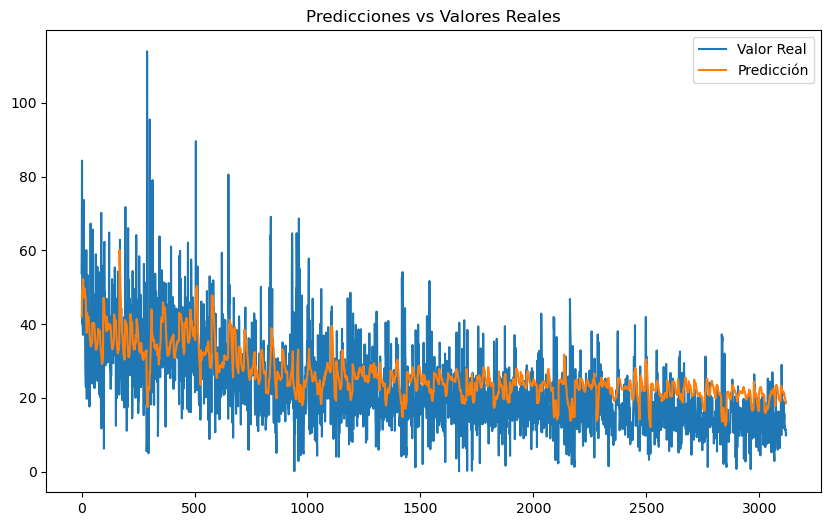

Top 10 productos con mayores errores:
     product_id      y_val  y_pred_val  error_abs
290       20192  114.01445   18.791233  95.223217
302       20192   95.49068   27.290348  68.200332
962       20234   68.63776   21.424212  47.213548
952       20233   64.66004   20.110783  44.549257
650       20216   80.56236   37.126148  43.436212
314       20193   79.07113   36.533688  42.537442
506       20207   89.63185   47.588905  42.042945
99        20180    6.21856   46.920349  40.701789
301       20192   65.40611   24.797461  40.608649
304       20192   69.71335   29.167574  40.545776

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.3565231100821514
MSE: 104.19387762688108
RMSE: 10.207540233909494
MAE: 8.025175664804276

Epoch 27: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 32: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
98/98 [==============================] - 0s 1ms/step


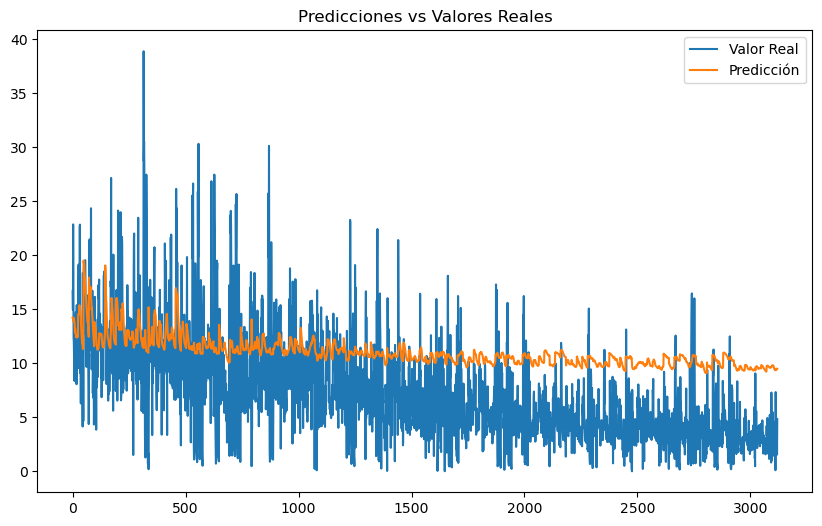

Top 10 productos con mayores errores:
     product_id     y_val  y_pred_val  error_abs
314       20398  38.89909   11.440149  27.458941
316       20398  30.55259   11.490098  19.062492
869       20449  30.13779   11.125120  19.012670
557       20418  30.33132   11.331538  18.999782
315       20398  28.74720   11.427752  17.319448
317       20398  28.45628   11.611265  16.845015
627       20422  27.48070   11.065674  16.415026
326       20398  27.47748   11.154039  16.323441
614       20421  26.86615   11.363250  15.502900
533       20416  26.65672   11.291982  15.364738

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.6821568649317147
MSE: 31.490311512858227
RMSE: 5.611622894747849
MAE: 4.8878823207304345

Epoch 20: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 25: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
98/98 [==============================] - 0s 1ms/step


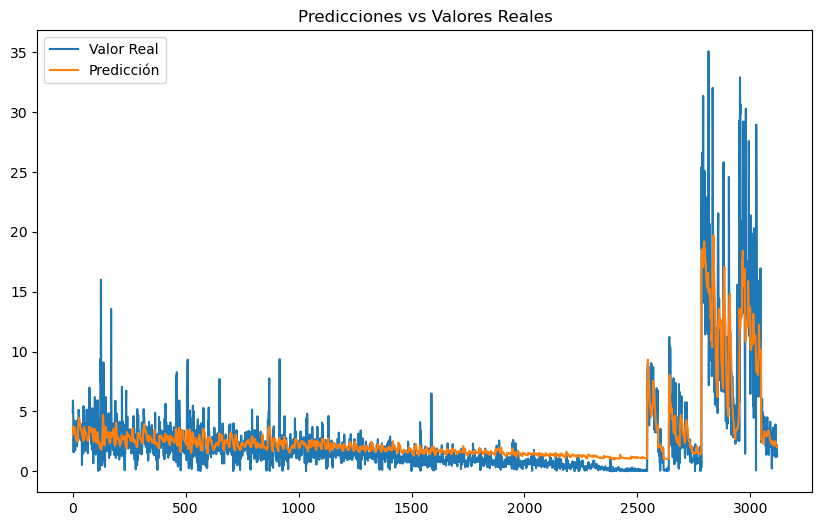

Top 10 productos con mayores errores:
      product_id     y_val  y_pred_val  error_abs
2954       20298  32.91894   12.021123  20.897817
3026       20417  28.97302    8.576911  20.396109
2815       20390  35.09422   14.951927  20.142293
2980       20343  30.30567   10.894600  19.411070
2956       20298  30.67412   12.110081  18.564039
2955       20298  29.83165   11.903492  17.928158
2952       20298  29.34069   13.588923  15.751767
2833       20415  32.03867   16.879398  15.159272
2979       20343  25.21645   10.843643  14.372807
2791       20319  31.36352   17.072506  14.291014

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.41923423774129687
MSE: 4.0248145687521175
RMSE: 2.0061940506222515
MAE: 1.1221691946840606

Epoch 16: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 21: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 29: ReduceLROnPlateau reducing learning rate to 1.2499999

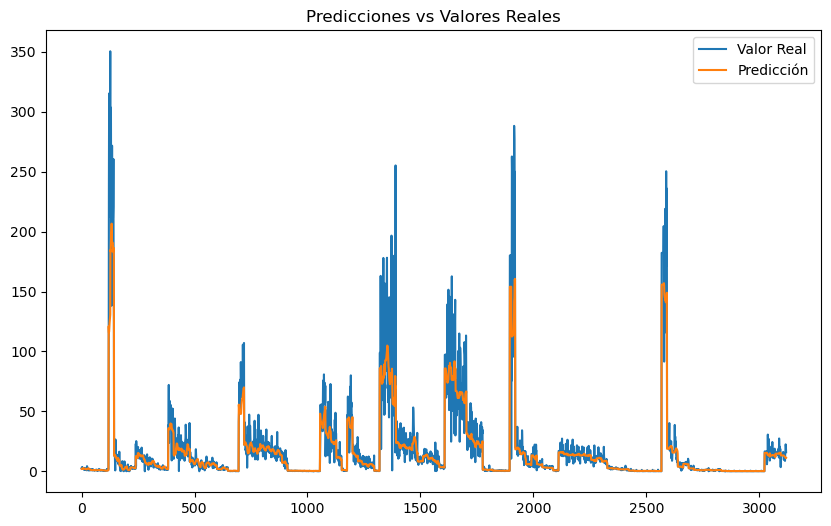

Top 10 productos con mayores errores:
      product_id      y_val  y_pred_val   error_abs
127        20049  350.45556  130.745773  219.709787
122        20049  315.28474  116.544342  198.740398
1390       20150  255.19384   69.359467  185.834373
126        20049  285.20856  128.405670  156.802890
1905       20089  262.66680  112.367439  150.299361
1915       20089  288.20468  141.764023  146.440657
1902       20089   10.54001  153.978851  143.438841
1913       20089  258.33790  115.401314  142.936586
1906       20089  246.70438  112.739639  133.964741
1916       20089  276.84555  144.836655  132.008895

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.3004573252803579
MSE: 255.19916270489503
RMSE: 15.97495423169954
MAE: 5.627354766155916

Epoch 17: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 22: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
98/98 [==============================] - 0s 1

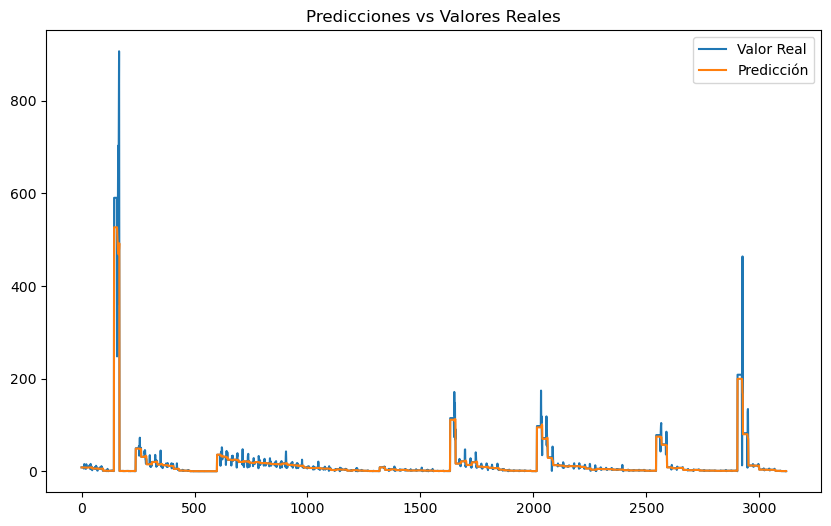

Top 10 productos con mayores errores:
      product_id      y_val  y_pred_val   error_abs
166        20032  906.69823  480.072632  426.625598
2926       20127  463.80054  168.932175  294.868365
157        20032  247.99880  526.721436  278.722636
165        20032  751.16808  473.424377  277.743703
163        20032  703.14059  468.491608  234.648982
162        20032  698.02627  469.742706  228.283564
2924       20127   12.80399  199.524750  186.720760
164        20032  629.90072  470.634674  159.266046
159        20032  361.38220  501.990387  140.608187
161        20032  605.54931  476.166840  129.382470

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.14306004215733378
MSE: 241.86186353146198
RMSE: 15.55190867808392
MAE: 2.470337709227526
       product_id     periodo  plan_precios_cuidados  cust_request_qty  \
28858       21087  2020-01-01                    NaN               NaN   
28859       21214  2020-01-01                    NaN

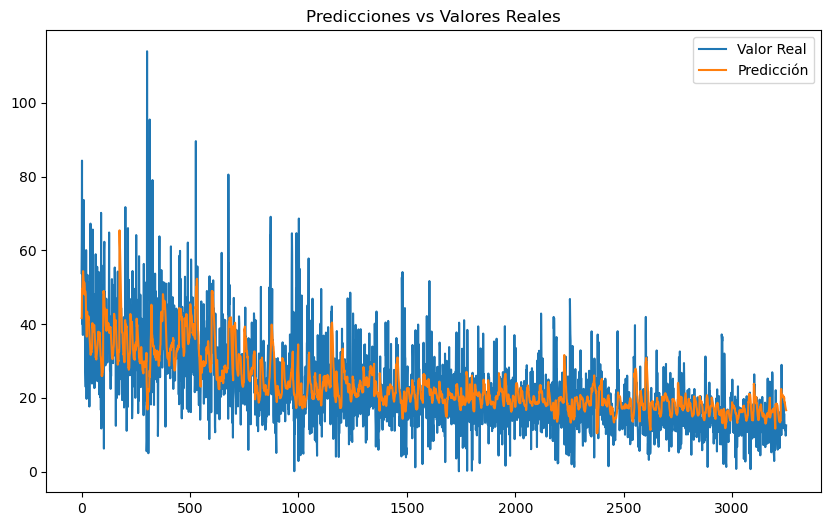

Top 10 productos con mayores errores:
      product_id      y_val  y_pred_val  error_abs
302        20192  114.01445   18.807867  95.206583
314        20192   95.49068   27.417871  68.072809
991        20233   64.66004   17.481138  47.178902
1002       20234   68.63776   22.693279  45.944481
327        20193   79.07113   35.827648  43.243482
677        20216   80.56236   37.457237  43.105123
103        20180    6.21856   48.892258  42.673698
527        20207   89.63185   47.951572  41.680278
316        20192   69.71335   28.157846  41.555504
90         20179   70.17899   29.484249  40.694741

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.2998195943711847
MSE: 87.04937807930379
RMSE: 9.33002562050629
MAE: 6.722061218051372

Epoch 54: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
102/102 [==============================] - 0s 1ms/step


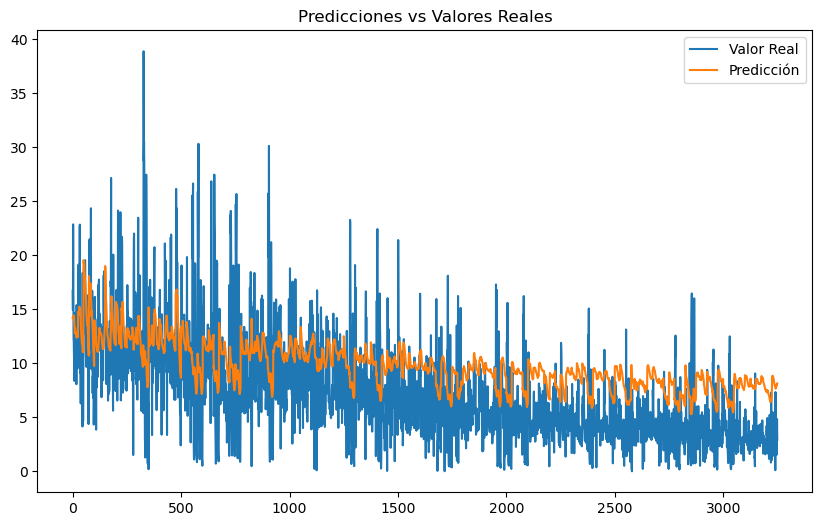

Top 10 productos con mayores errores:
     product_id     y_val  y_pred_val  error_abs
327       20398  38.89909   10.432411  28.466679
905       20449  30.13779    8.536831  21.600959
580       20418  30.33132    9.698904  20.632416
329       20398  30.55259   10.213843  20.338747
653       20422  27.48070    8.902465  18.578235
328       20398  28.74720   10.257441  18.489759
330       20398  28.45628   10.092237  18.364043
555       20416  26.65672    9.315009  17.341711
339       20398  27.47748   10.137849  17.339631
755       20429  25.68372    8.802025  16.881695

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.561701773140702
MSE: 21.821320173618062
RMSE: 4.671329593768573
MAE: 3.9936468967013887

Epoch 21: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 26: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
102/102 [==============================] - 0s 1ms/step


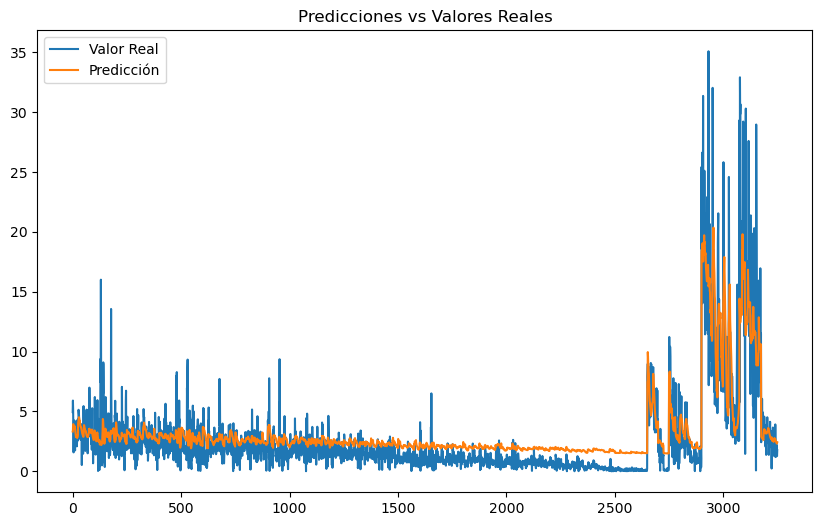

Top 10 productos con mayores errores:
      product_id     y_val  y_pred_val  error_abs
3077       20298  32.91894   12.703010  20.215930
3152       20417  28.97302    9.156058  19.816962
2932       20390  35.09422   15.451752  19.642468
3104       20343  30.30567   11.380983  18.924687
3079       20298  30.67412   12.480462  18.193658
3078       20298  29.83165   12.429100  17.402550
3075       20298  29.34069   14.427777  14.912913
2951       20415  32.03867   17.283733  14.754937
2907       20319  31.36352   17.528513  13.835007
3117       20343  27.60157   13.819832  13.781738

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.4994036254263027
MSE: 4.245491519115276
RMSE: 2.0604590554328603
MAE: 1.3270593513693547

Epoch 18: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 43: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 54: ReduceLROnPlateau reducing learning rate to 1.249999968

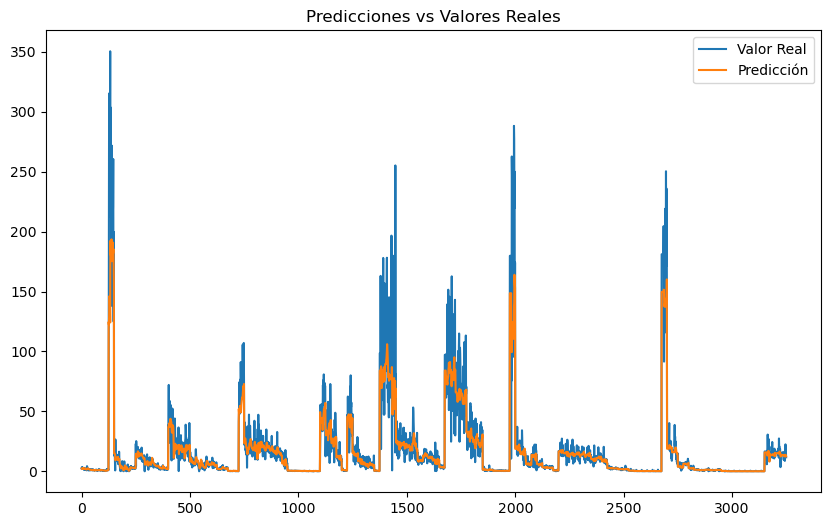

Top 10 productos con mayores errores:
      product_id      y_val  y_pred_val   error_abs
132        20049  350.45556  124.181404  226.274156
1447       20150  255.19384   62.018711  193.175129
127        20049  315.28474  129.877518  185.407222
1984       20089  262.66680   99.430893  163.235907
1994       20089  288.20468  137.897507  150.307173
131        20049  285.20856  136.997833  148.210727
1992       20089  258.33790  116.325508  142.012392
1985       20089  246.70438  107.563835  139.140545
1981       20089   10.54001  148.565628  138.025618
1995       20089  276.84555  140.482712  136.362838

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.2831628180201946
MSE: 240.600938758309
RMSE: 15.511316474055612
MAE: 5.279953368493475

Epoch 16: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 21: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
102/102 [==============================] - 0s 

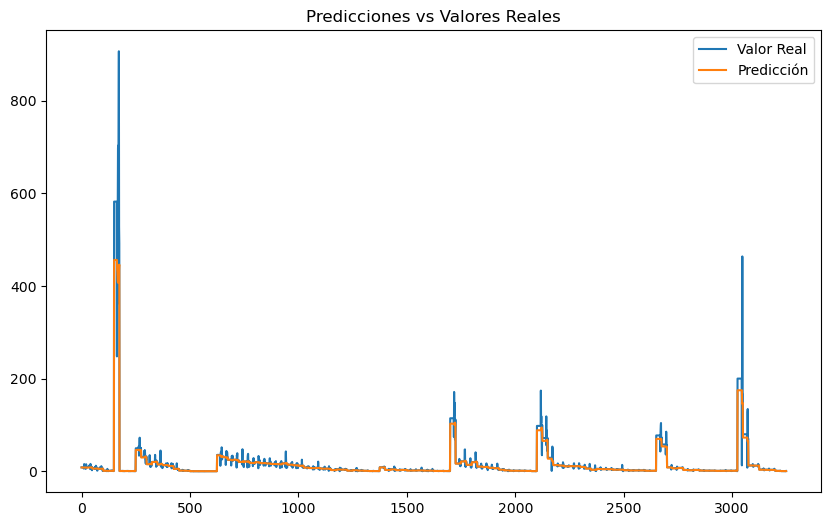

Top 10 productos con mayores errores:
      product_id      y_val  y_pred_val   error_abs
172        20032  906.69823  427.764496  478.933734
171        20032  751.16808  418.968323  332.199757
3047       20127  463.80054  145.663956  318.136584
169        20032  703.14059  409.571655  293.568935
168        20032  698.02627  406.988525  291.037745
170        20032  629.90072  414.619385  215.281335
163        20032  247.99880  456.230164  208.231364
167        20032  605.54931  409.453217  196.096093
3045       20127   12.80399  174.895645  162.091655
164        20032  573.57324  436.214050  137.359190

-------------------------------------------------------
Cant de productos a predecir:  780


TFE: 0.18180068208437528
MSE: 339.1639290795326
RMSE: 18.416403804204897
MAE: 3.105117706053055
   product_id          tn
0       20001  931.794861
1       20002  781.970459
Predicciones ajustadas guardadas en ./666_Kaggle/Entregas/20240714-0807-LSTM_LE_varios7_feb_tfe2_0.csv


In [8]:
# Con Normalizacion StandarScaler() y Transformación Logarítmica

import pandas as pd

ventas_LTSM_path = './66_Datos/sell-z-780-all-LTSM.csv'
df_ventas = pd.read_csv(ventas_LTSM_path)

# Convertir la columna 'periodo' a tipo datetime
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'], format='%Y-%m-%d')

# Formatear la fecha según el formato deseado
#print(df_ventas.info())

df_ventas.head(2)

import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import legacy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
SEED = 52
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

def process_and_train_model(df_ventas, seq_length=12, epochs=100, batch_size=32, learning_rate=0.001, patience=20, verbose=0):
    # Preparación de datos
    df_full = df_ventas[['periodo', 'product_id', 'cat1', 'tn']].copy()
    
    # Identificar los valores cero antes de reemplazar
    valores_cero_antes = df_full[df_full['tn'] == 0].copy()

    # Calcular la media de 'tn' por 'product_id' y reemplazar los valores cero por esta media
    mean_tn_by_product = df_full[df_full['tn'] != 0].groupby('product_id')['tn'].mean()
    df_full.loc[df_full['tn'] == 0, 'tn'] = df_full['product_id'].map(mean_tn_by_product)

    # Reemplazar NaN con la media global de tn
    global_mean_tn = df_full['tn'].mean()
    df_full['tn'].fillna(global_mean_tn, inplace=True)

    # Identificar los valores que fueron reemplazados
    valores_cero_despues = df_full.loc[valores_cero_antes.index]
    valores_reemplazados = valores_cero_despues[valores_cero_despues['tn'] != 0]

    # Imprimir los valores que fueron reemplazados
    print(f"Valores en 0 antes del reemplazo:\n{valores_cero_antes.head(2)}")
    print(f"Valores después del reemplazo:\n{valores_reemplazados.head(2)}")
    
    # Aplicar la transformación logarítmica
    df_full['tn'] = np.log1p(df_full['tn'])
    
    # Estandarización de datos
    scaler = StandardScaler()
    df_full['tn'] = scaler.fit_transform(df_full[['tn']])
    
    # Label Encoding para cat1
    label_encoder = LabelEncoder()
    df_full['cat1'] = label_encoder.fit_transform(df_full['cat1'])

    def create_sequences(data, seq_length):
        sequences = []
        labels = []
        for i in range(len(data) - seq_length):
            seq_data = data.iloc[i:i + seq_length].values
            sequences.append(seq_data)
            labels.append(data.iloc[i + seq_length]['tn'])
        return np.array(sequences), np.array(labels)

    product_sequences = {}
    for product_id in df_full['product_id'].unique():
        product_data = df_full[df_full['product_id'] == product_id].drop(columns=['product_id', 'periodo'])
        sequences, labels = create_sequences(product_data, seq_length)
        product_sequences[product_id] = (sequences, labels)

    # Preparar los datos de entrenamiento
    X = np.concatenate([product_sequences[pid][0] for pid in product_sequences])
    y = np.concatenate([product_sequences[pid][1] for pid in product_sequences])
    product_ids = np.concatenate([[pid]*len(product_sequences[pid][1]) for pid in product_sequences])
    
    # Redimensionar los datos para que sean compatibles con LSTM
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

    # Utilizar TimeSeriesSplit para dividir los datos
    tscv = TimeSeriesSplit(n_splits=5)
    
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),  # Primera capa LSTM
            LSTM(50, return_sequences=False),  # Segunda capa LSTM
            Dropout(0.2),  # Mantener el dropout para regularización
            Dense(25, activation='relu'),  # Reducir el tamaño de la capa densa
            Dense(1)  # Capa de salida
        ])
        
        optimizer = legacy.Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mean_squared_error')

        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=verbose)

        X_pred = np.array([product_sequences[pid][0][-1] for pid in product_sequences])
        predictions = model.predict(X_pred)
        predictions = scaler.inverse_transform(predictions)
        
        # Invertir la transformación logarítmica
        predictions = np.expm1(predictions)

        results = pd.DataFrame({
            'product_id': df_full['product_id'].unique(),
            'tn_pred': predictions.flatten()
        })

        y_pred_val = model.predict(X_val)

        y_val = y_val.reshape(-1, 1)
        y_pred_val = y_pred_val.reshape(-1, 1)
        
        y_pred_val = scaler.inverse_transform(y_pred_val)
        y_val = scaler.inverse_transform(y_val)

        # Invertir la transformación logarítmica para los valores de validación y predicción
        y_pred_val = np.expm1(y_pred_val)
        y_val = np.expm1(y_val)

        plt.figure(figsize=(10,6))
        plt.plot(y_val, label='Valor Real')
        plt.plot(y_pred_val, label='Predicción')
        plt.legend()
        plt.title('Predicciones vs Valores Reales')
        plt.show()

        # Calcular el error absoluto para cada predicción
        error_abs = np.abs(y_val - y_pred_val)

        # Crear un DataFrame para almacenar los resultados con errores
        df_errors = pd.DataFrame({
            'product_id': product_ids[val_index],  # Asegúrate de que esto contiene los IDs de los productos correspondientes
            'y_val': y_val.flatten(),
            'y_pred_val': y_pred_val.flatten(),
            'error_abs': error_abs.flatten()
        })

        # Ordenar por error absoluto en orden descendente para identificar los mayores errores
        df_errors_sorted = df_errors.sort_values(by='error_abs', ascending=False)

        # Identificar los top 10 productos con mayores errores
        top_errors = df_errors_sorted.head(10)

        print("Top 10 productos con mayores errores:")
        print(top_errors)

        tfe = np.sum(np.abs(y_val - y_pred_val)) / np.sum(np.abs(y_val))

        mse = mean_squared_error(y_val, y_pred_val)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred_val)

        print("\n-------------------------------------------------------")
        print("Cant de productos a predecir: ", df_ventas.product_id.nunique())
        print("\n")
        print(f'TFE: {tfe}')
        print(f'MSE: {mse}')
        print(f'RMSE: {rmse}')
        print(f'MAE: {mae}')

    return results, df_errors_sorted

# Ejemplo de uso de la función

# kaggle 253
#results, df_errors_sorted = process_and_train_model(df_ventas, seq_length=12, epochs=100, batch_size=32, learning_rate=0.0001, patience=10, verbose=0)
results, df_errors_sorted = process_and_train_model(df_ventas, seq_length=12, epochs=150, batch_size=64, learning_rate=0.0001, patience=10, verbose=0)

# Guardar resultados
results_toCsv = results.copy()
results_toCsv = results_toCsv.rename(columns={'tn_pred': 'tn'})

tfe2 = 0
str_tfe2 = "_tfe2_" + str(round(tfe2, 4)) 

# Guardar el archivo final
suffix_general = 'LSTM_LE_varios7_ene' + "_tfe2_" + str(round(0, 4))
file_to_kaggle = nombre_file(suffix_general)
results.to_csv(file_to_kaggle, index=False)

# Calcular el siguiente período (suponiendo que los periodos son mensuales)
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'], format='%Y%m')
ultimo_periodo = df_ventas['periodo'].max()
siguiente_periodo = ultimo_periodo + pd.DateOffset(months=1)

# Actualizar las 'tn' del siguiente período con las 'tn' de results
df_ventas['periodo'] = df_ventas['periodo'].dt.strftime('%Y%m')
results_toCsv['periodo'] = siguiente_periodo.strftime('%Y%m')
df_ventas2 = pd.concat([df_ventas, results_toCsv], ignore_index=True)

# Vuelvo a convertir a 'periodo' a tipo datetime
#      Convertir la columna 'periodo' a datetime con el formato %Y%m
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'], format='%Y%m')
df_ventas2['periodo'] = pd.to_datetime(df_ventas2['periodo'], format='%Y%m')
#      Formatear la columna 'periodo' a YYYY-MM-DD, estableciendo el día como 01
df_ventas['periodo'] = df_ventas['periodo'].dt.strftime('%Y-%m-%d')
df_ventas2['periodo'] = df_ventas2['periodo'].dt.strftime('%Y-%m-%d')


# Verificar el resultado
print(df_ventas2.tail(2))

# Entrenar el modelo con datos hasta el último período actualizado
results2, df_errors_sorted2 = process_and_train_model(df_ventas2, seq_length=12, epochs=150, batch_size=64, learning_rate=0.0001, patience=10, verbose=0)
results2 = results2.rename(columns=({'tn_pred': 'tn'}))

# Verificar el resultado
print(results2.head(2))

# Guardar el archivo final
suffix_general = 'LSTM_LE_varios7_feb' + "_tfe2_" + str(round(0, 4))
file_to_kaggle = nombre_file(suffix_general)
results2.to_csv(file_to_kaggle, index=False)

print(f'Predicciones ajustadas guardadas en {file_to_kaggle}')

